In [1]:
#Import our dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pandas import datetime

 # Import our input dataset
cbp_df = pd.read_csv("Clean_Bee_Pop.csv")
cbp_df.head()

<ipython-input-1-72b5e47fca48>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,Year,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown,POPULATION
0,2015,AL,8000,8000,610,8,3,6,0,0,3,2,4852347
1,2015,AZ,36000,39000,12000,31,50,2,1,4,1,16,6829676
2,2015,AR,23000,27000,2400,9,38,10,0,8,9,1,2978048
3,2015,CA,750000,1260000,149000,12,37,13,6,12,11,7,38918045
4,2015,CO,24000,24000,2500,10,48,24,21,20,8,2,5450623


In [2]:
cbp_df.drop(columns=["Maximum_colonies1", "Diseases","Varroa_mites", "Pestticides", "Other3","colonies", "POPULATION","Unknown","Lost_colonies","Other_parasites"], inplace=True)

In [3]:
cbp_df.head()

,Year,State,Percent_lost2
0,2015,AL,8
1,2015,AZ,31
2,2015,AR,9
3,2015,CA,12
4,2015,CO,10


In [4]:
cbp_df.to_csv("cbp.csv")

            Year State  Percent_lost2
2017-01-01  2015    AL              8
2017-01-01  2015    AZ             31
2017-01-01  2015    AR              9
2017-01-01  2015    CA             12
2017-01-01  2015    CO             10


NameError: name 'pyplot' is not defined

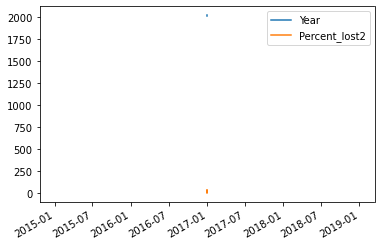

In [19]:
def parser(x):
	return datetime.strptime('2017', '%Y')
 
series = pd.read_csv('cbp.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [23]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
def parser(x):
	return datetime.strptime('2017'+x, '%Y')
 
series = pd.read_csv('cbp.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

<ipython-input-23-d25a09e9f5ce>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ValueError: unconverted data remains: 0

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
dataset = pd.read_csv('cbp.csv')
X = dataset['Year'].values
y = dataset['Percent_lost2'].values
dataset.head(5)

,Unnamed: 0,Year,State,Percent_lost2
0,0,2015,AL,8
1,1,2015,AZ,31
2,2,2015,AR,9
3,3,2015,CA,12
4,4,2015,CO,10


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [27]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [28]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [29]:
dataset= pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
dataset


,Real Values,Predicted Values
0,9,11.142857
1,8,11.142857
2,13,13.682927
3,18,12.095238
4,8,13.682927
5,11,12.095238
6,13,11.142857
7,15,12.095238
8,14,11.790698
9,12,13.682927


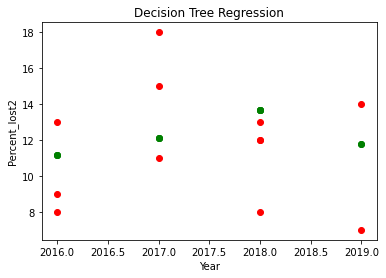

In [30]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Year')
plt.ylabel('Percent_lost2')
plt.show()

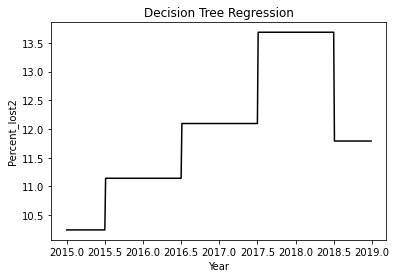

In [31]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Year')
plt.ylabel('Percent_lost2')
plt.show()